In [152]:
import csv, math

data=[]

csv.register_dialect('skip_space', skipinitialspace=True)
with open('data/hk0.dat', 'r') as f:
      reader=csv.reader(f , delimiter=' ', dialect='skip_space')
      for item in reader:
        phase = float(item[7]) / np.pi  # divide by pi
        phase = int(np.round(phase)) # nearest int
        phase = phase % 2  # make 1 or 0
        phase = phase / 2  # make 0.5 or 0
        hkstr = "%d %d"%(int(item[0]), int(item[1]))
        d = [ int(item[0]), int(item[1]), float(item[5]), phase, phase, hkstr ] #store twice (last keeps original value)
        if ( d[0] < 10 and d[1] < 10 ):
            data.append( d )
            
print("There are %d data" % len(data))
                    
from ipywidgets import interactive
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np



There are 88 data


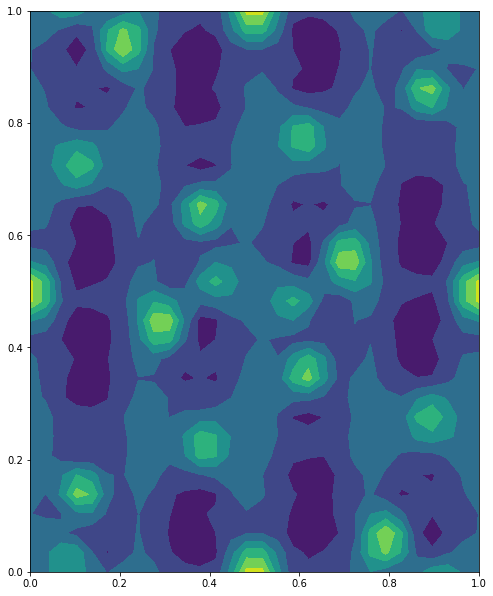

In [159]:
xc = np.linspace(0, 1, num=30)
yc = np.linspace(0, 1, num=30)
xx, yy = np.meshgrid(xc, yc)
fig,ax = plt.subplots(1,1)
plt.rcParams["figure.figsize"] = (8.04,10.32) # These are the cell lengths in Angstroms - keep this ration constant.


def doplot():
    zz = np.sin(0* xx + 0 * yy) + 0 # init empty


    for d in data:
    # A note on the symmetry here. P21212 has four symmetry operations, and
    # our data set is symmetry unique. We generate the other three index combinations
    # using two two-fold screw operations and one two fold rotation. The screw operations
    # have a translational component which is the source of the 0.5's in the
    # third and fourth line.
        zz += d[2] * np.cos( 2 * np.pi * ( d[0] * xx + d[1] * yy  + d[3] ) ) 
        zz += d[2] * np.cos( 2 * np.pi * ( -d[0] * xx - d[1] * yy + d[3] ) ) 
        zz += d[2] * np.cos( 2 * np.pi * ( -d[0] * ( xx + 0.5 ) + d[1] * ( yy + 0.5 ) + d[3]  )) 
        zz += d[2] * np.cos( 2 * np.pi * ( d[0] * ( xx + 0.5 ) - d[1] * ( yy + 0.5 ) + d[3] ) ) 


    h = ax.contourf(xx,yy,zz)

    fig.canvas.draw()
    

def on_button_clicked(c):
        print("Button clicked.", c)
        if c['name'] == 'value':
            dl = [x for x in data if x[5] == c['owner'].description]
            if ( len(dl) > 0 ):
                dl[0][3] = 0.5 if c['new'] else 0
            doplot()



doplot()
        
b=[]
cur = data[0][1]
for d in data:
    if ( cur != d[1] ):
        display (widgets.HBox([x for x in b]))
        b = []
        cur = d[1]

    btn = widgets.ToggleButton(
        value=d[4]>0.25,
        description="%d %d"%(d[0],d[1]),
        disabled=False,
        button_style='', # 'success', 'info', 'warning', 'danger' or ''
        tooltip="Set %d %d phase 0 or 180"%(d[0],d[1]),
        icon='' # (FontAwesome names without the `fa-` prefix)
    )
    btn.observe(on_button_clicked)
    b.append( btn )

if ( cur != d[1] ):
    display (widgets.HBox([x for x in b]))

